# 965. Univalued Binary Tree
A binary tree is **uni-valued** if every node in the tree has the same value.  
Given the `root` of a binary tree, return `true` if the given tree is uni-valued, or `false` otherwise.

**Example 1**  
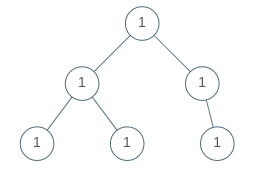  
**Input:** root = [1,1,1,1,1,null,1]  
**Output:** true  

**Example 2**  
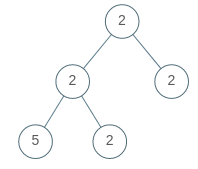  
**Input:** root = [2,2,2,5,2]  
**Output:** false

The number of nodes in the tree is in the range `[1, 100]`.  
`0 <= Node.val < 100`

In [9]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
from typing import Optional


class Solution:
    def isUnivalTree(self, root: Optional[TreeNode]) -> bool:
        
        sameAsRoot = []
        def traverse(node):
            if node.left != None:
                traverse(node.left)
            if node.right != None:
                traverse(node.right)
            sameAsRoot.append(node.val == root.val)

        traverse(root)
        return all(sameAsRoot)



In [10]:
sol = Solution()
input1 = TreeNode(1, 
    TreeNode(1, 
        TreeNode(1), 
        TreeNode(1)
    ), 
    TreeNode(1, 
        None, 
        TreeNode(1)
    )
)
input2 = TreeNode(2, 
    TreeNode(2, 
        TreeNode(5), 
        TreeNode(2)
    ), 
    TreeNode(2)
)
print(sol.isUnivalTree(input1))
print(sol.isUnivalTree(input2))

True
False


## Notes ##
* Was able to get a solution without referencing others solutions
* Was able to get a solution without referencing any of the hints
* Was able to get a solution without asking chatGPT to fix/give me one to look at  
* Not the most elegant solution, I could have done it better by breaking out of the recursion as soon as any value is not the same as the root.
* Need to work on my recursive skills with returning true/false and terminating early etc.
* Also should work and practice DFS/BFS recursively and iteratively as they show up a lot in many patterns/problems.

Big O of recursive functions??... Need to learn and practice  
Space complexity??.. Need to learn/practice
---

# 1299. Replace Elements with Greatest Element on Right Side
Given an array `arr`, replace every element in that array with the greatest element among the elements to its right, and replace the last element with `-1`.  
After doing so, return the array.  

**Example 1**  
**Input:** arr = [17,18,5,4,6,1]  
**Output:** [18,6,6,6,1,-1]  
**Explanation:** 
- index 0 --> the greatest element to the right of index 0 is index 1 (18).
- index 1 --> the greatest element to the right of index 1 is index 4 (6).
- index 2 --> the greatest element to the right of index 2 is index 4 (6).
- index 3 --> the greatest element to the right of index 3 is index 4 (6).
- index 4 --> the greatest element to the right of index 4 is index 5 (1).
- index 5 --> there are no elements to the right of index 5, so we put -1.

**Example 2**  
**Input:** arr = [400]  
**Output:** [-1]  
**Explanation:** There are no elements to the right of index 0.

Constraints:  
`1 <= arr.length <= 10^4`  
`1 <= arr[i] <= 10^5`

In [ ]:
from typing import List

class Solution1:
    def replaceElements(self, arr: List[int]) -> List[int]:
        for idx in range(len(arr) - 1):
            arr[idx] = max(arr[idx + 1:])
        arr[-1] = -1
        return arr
class Solution2:
    def replaceElements(self, arr: List[int]) -> List[int]:
        maxSeen = arr[-1]
        for idx in range(len(arr) - 1, -1, -1):
            val = arr[idx]
            arr[idx] = maxSeen
            maxSeen = max(maxSeen, val)
        arr[-1] = -1
        return arr


In [16]:
sol1 = Solution1()
sol2 = Solution2()

print(sol1.replaceElements([17,18,5,4,6,1])) # [18,6,6,6,1,-1]
print(sol1.replaceElements([400])) # [-1]

print(sol2.replaceElements([17,18,5,4,6,1])) # [18,6,6,6,1,-1]
print(sol2.replaceElements([400])) # [-1]


[18, 6, 6, 6, 1, -1]
[-1]
[18, 6, 6, 6, 1, -1]
[-1]


## Notes ##
* Was able to get a solution without referencing others solutions
* Was able to get a solution without referencing any of the hints
* Was able to get a solution without asking chatGPT to fix/give me one to look at
* While correct, my initial submission did not pass due to exceeding the time limit (TLE).
* I was able to come up with the initial solution rather quickly, but the second solution took me longer because I had forgotten to put the current value we are looking at into a temp variable before replacing.
* Initial solution takes O(N) traversing the array, and getting the max takes O(N - i) where i is the number of elements already processed (index), so the overall time complexity is O(n^2)
* The second solution takes O(N) traversing the array as well, but we only use the max function to compare two values, so this time it is O(1). This gives us an overall time complexity of O(N) which is why the second solution passes but my first one did not.